-->initialization-->exploration-->rewards-->updating-->transition--->

### Functions and Packages

In [430]:
import numpy as np
np.set_printoptions(precision = 4, suppress = True)


In [431]:
def initialize_qtable(N, num_actions, feedback):
    if feedback == 1:
        Q = np.random.uniform(0,1,(N, num_actions,num_actions))
    else:
        Q = np.random.uniform(0,1,(N, num_actions))   
        #Q = np.zeros((N, num_actions))   
    return Q

In [482]:
N = 2
num_actions = 6
feedback = 0
Q = initialize_qtable(N, num_actions, feedback)
Q

array([[0.9348, 0.503 , 0.6817, 0.282 , 0.3424, 0.7317],
       [0.8208, 0.6075, 0.7395, 0.9539, 0.3154, 0.3451]])

In [483]:
N = 2
num_actions = 6
feedback = 1
Q = initialize_qtable(N, num_actions, feedback)
Q

array([[[0.7679, 0.64  , 0.6465, 0.821 , 0.2142, 0.4869],
        [0.5975, 0.8433, 0.9499, 0.4093, 0.5207, 0.41  ],
        [0.4908, 0.0298, 0.8206, 0.018 , 0.6622, 0.1183],
        [0.2063, 0.9079, 0.3496, 0.3156, 0.253 , 0.2393],
        [0.1516, 0.8022, 0.2728, 0.8981, 0.8532, 0.9926],
        [0.9087, 0.776 , 0.6186, 0.0583, 0.214 , 0.8876]],

       [[0.8369, 0.4538, 0.9912, 0.2542, 0.9388, 0.1636],
        [0.2491, 0.8649, 0.2856, 0.6768, 0.8989, 0.4588],
        [0.066 , 0.1417, 0.3883, 0.0727, 0.8751, 0.1181],
        [0.8521, 0.214 , 0.3928, 0.4683, 0.2888, 0.5773],
        [0.5593, 0.2711, 0.932 , 0.905 , 0.4555, 0.8659],
        [0.5611, 0.9664, 0.5016, 0.1555, 0.9839, 0.8736]]])

In [466]:
def exploratory_strategy(Q, N, egreedy, num_actions,past_win,winning_bid,eps,beta):
    # Input: Master Q table, agent index, past winning action
    # Output: actions taken by all agents
    actions = np.ones(N,dtype=int)
    for agent_idx in range(N):
        if egreedy == 1:
            if past_win == 1:
                if np.random.uniform()>eps:
                    actions[agent_idx] = np.argmax(Q[agent_idx,winning_bid])
                else:
                    actions[agent_idx] = np.random.choice(range(num_actions))
            else:
                if np.random.uniform()>eps:
                    actions[agent_idx] = np.argmax(Q[agent_idx])
                else:
                    actions[agent_idx] = np.random.choice(range(num_actions))
        else: 
            if past_win == 1:
                max_Q = np.max(Q[agent_idx,winning_bid])
                logits = (Q[agent_idx,winning_bid] - max_Q) / beta
                exp_logits = np.exp(logits)
                probs = exp_logits / np.sum(exp_logits)
                actions[agent_idx] = np.random.choice(range(len(probs)), p=probs)
            else:
                max_Q = np.max(Q[agent_idx])
                logits = (Q[agent_idx] - max_Q) / beta
                exp_logits = np.exp(logits)
                probs = exp_logits / np.sum(exp_logits)
                actions[agent_idx] = np.random.choice(range(len(probs)), p=probs)    
    return actions

In [467]:
egreedy = 1
past_win = 0
winning_bid = 0
eps = 0.99
beta = 0.99
actions = exploratory_strategy(Q, N, egreedy, num_actions,past_win,winning_bid,eps,beta)
actions

array([3, 1])

In [468]:
egreedy = 0
beta = 4.0
actions = exploratory_strategy(Q, N, egreedy, num_actions,past_win,winning_bid,eps,beta)
print(Q)
actions

[[0.1379 0.8257 0.6508 0.3534 0.6836 0.3371]
 [0.8323 0.1554 0.2224 0.7083 0.0006 0.3988]]


array([1, 0])

In [469]:
def actions2rewards(actions, valuations, design, action2bid, method=0):
    # compute winners and winning payments
    bids = action2bid[actions]
    unique_values_sorted = np.sort(np.unique(bids))[::-1]
    first_highest_value = unique_values_sorted[0]
    if len(unique_values_sorted) > 1:
        second_highest_value = unique_values_sorted[1]
    else:
        second_highest_value = first_highest_value
    winners_payment = design * first_highest_value + (1-design) * second_highest_value
    winners_idx = np.where(bids == first_highest_value)[0]
    # compute reward vector
    if method==0:
        winner_idx = np.random.choice(winners_idx)
        rewards = bids * 0.0
        rewards[winner_idx] = valuations[winner_idx] - winners_payment
    else:
        winning_bid_idx = np.where(bids==first_highest_value,1,0)
        no_of_winners = np.sum(winning_bid_idx)
        rewards = (1/no_of_winners) * (valuations - winners_payment) * winning_bid_idx 
    return rewards

In [470]:
valuations = np.array([1,1])
design = 1
common_valuation = 1
action2bid = np.linspace(0,common_valuation,num_actions)
print('bids',action2bid[actions])
rewards = actions2rewards(actions, valuations, design, action2bid, method=0)
print('rewards',rewards)

bids [0.2 0. ]
rewards [0.8 0. ]


In [471]:
def counterfactual_reward(agent_idx,actions,valuations,design,num_actions,action2bid):
    action_copy = actions.copy()
    cf_rewards = np.zeros(num_actions)
    for agent_action in range(num_actions):
        action_copy[agent_idx] = agent_action
        cf_rewards[agent_action] = actions2rewards(action_copy,valuations,design,action2bid,method=1)[agent_idx]
    return np.array(cf_rewards)

In [472]:
actions

array([1, 0])

In [473]:
counterfactual_reward(0,actions,valuations,design,num_actions,action2bid)

array([0.5, 0.8, 0.6, 0.4, 0.2, 0. ])

In [474]:
bids = np.array([0.2,0.2,0.2,0.2])
bids2rewards(bids,np.array([1,1,1,1]),0)

array([0. , 0. , 0.8, 0. ])

In [475]:
np.partition(bids.flatten(), -2)[-2]

0.2

In [476]:
def update_qvalues(rewards, actions, Q, feedback, asynchronous, winning_bid, alpha, gamma, valuations,design,action2bid):
    N = Q.shape[0]
    num_actions = Q.shape[1]
    for agent_idx in range(N):
        action = actions[agent_idx]
        reward = rewards[agent_idx]
        if asynchronous == 1:
            if feedback == 1:
                Q[agent_idx,winning_bid,action] =  (1-alpha)*Q[agent_idx,winning_bid,action] + alpha * (reward + gamma * np.max(Q[agent_idx,winning_bid]))
            else:
                Q[agent_idx,action] =  (1-alpha)*Q[agent_idx,action] + alpha * (reward + gamma * np.max(Q[agent_idx]))
        else: 
            reward_vec = counterfactual_reward(agent_idx,actions,valuations,design,num_actions,action2bid)
            if feedback == 1:
                Q[agent_idx,winning_bid,:] =  (1-alpha)*Q[agent_idx,winning_bid,:] + alpha * (reward_vec + gamma * np.max(Q[agent_idx,winning_bid]))
            else:
                Q[agent_idx] =  (1-alpha)*Q[agent_idx] + alpha * (reward_vec + gamma * np.max(Q[agent_idx]))
    return Q

In [477]:
alpha = 0.1
gamma = 0.0
asynchronous = 0

Q_old = Q.copy()
Q_new = update_qvalues(rewards, actions, Q, feedback, asynchronous, winning_bid, alpha, gamma, valuations,design,action2bid)

print(Q_old)
print(counterfactual_reward(0,actions,valuations,design,num_actions,action2bid))
print(counterfactual_reward(1,actions,valuations,design,num_actions,action2bid))
print(Q_new)

[[0.1379 0.8257 0.6508 0.3534 0.6836 0.3371]
 [0.8323 0.1554 0.2224 0.7083 0.0006 0.3988]]
[0.5 0.8 0.6 0.4 0.2 0. ]
[0.  0.4 0.6 0.4 0.2 0. ]
[[0.1741 0.8231 0.6458 0.358  0.6352 0.3033]
 [0.749  0.1799 0.2602 0.6775 0.0206 0.3589]]


In [526]:
def experiment(N,alpha,gamma,egreedy,asynchronous,design,feedback,num_actions,decay,verbose=2):
    Q = initialize_qtable(N, num_actions,feedback)
    common_valuation = 1
    valuations = np.ones(N)*common_valuation
    action2bid = np.linspace(0,common_valuation,num_actions)
    initial_eps = 1.0
    eps_decay = decay
    min_eps = 0.01
    eps = initial_eps
    initial_beta = 1.0
    beta_decay = decay
    min_beta = 0.01
    beta = initial_beta
    winning_bid_history = []
    num_episodes = 200000
    winning_action = 0
    
    print('Bidders:',N)
    print('Learning rate:',alpha)
    print('Discount factor:',gamma)
    print('eGreedy',egreedy)
    print('Asynchronous',asynchronous)
    print('First price:',design)
    print('Feedback:',feedback)
    print('Bid space:',action2bid)
    print('Q-table shape:',Q.shape)
    print('Epsilon: initial, final and decay rate', initial_eps, min_eps, eps_decay)
    print('Beta: initial, final and decay rate', initial_beta, min_beta, beta_decay)
    print('Num episodes:', num_episodes)

    # training loop
    for episode in range(num_episodes):
        
        # act from exploratory strategy
        actions = exploratory_strategy(Q, N, egreedy, num_actions,feedback,winning_action,eps,beta) 

        # collect rewards
        rewards = actions2rewards(actions,valuations,design,action2bid)
        
        # update Q-values
        Q = update_qvalues(rewards, actions, Q, feedback, asynchronous, winning_action, alpha, gamma, valuations,design,action2bid)

        # update exploration params
        eps = max(min_eps, eps * eps_decay)
        beta = max(min_beta, beta * beta_decay)

        # winning bid and action
        bids = actions*common_valuation/(num_actions-1)
        winning_bid = np.max(bids)
        winning_action = np.max(actions)

        # store history
        winning_bid_history.append(winning_bid)
        
        if (verbose==1) & (episode%10000==0) & (episode>0):
            print(episode,np.round(eps,2),np.round(beta,2),np.round(np.mean(winning_bid_history[-1000:]),2),np.round(np.std(winning_bid_history[-1000:]),2))

        if (verbose==2) & (episode%10000==0) & (episode>0):
            print('\nEpisode:',episode,np.round(eps,3))
            print('Bids:',action2bid[actions],', Rewards:',rewards)
            #print(winning_bid_history[-20:])
            print('Agent 0:',Q[0,:])
            #print('Agent 0 Cf reward', counterfactual_reward(0,actions,valuations,design,num_actions,action2bid))
            print('Agent 1:',Q[1,:])
            #print('Agent 1 Cf reward', counterfactual_reward(1,actions,valuations,design,num_actions,action2bid))
            print('Stdev of last 10000 bids:',np.std(winning_bid_history[-10000:]))
            print('Avg of last 10000 bids:',np.mean(winning_bid_history[-10000:]))
            
        if (episode%10000==0) & (episode>0) & (np.std(winning_bid_history[-1000:])<0.01):
            break

    Y = np.mean(winning_bid_history[-1000:])
    Y_std = np.std(winning_bid_history)
    return (Y,episode,Y_std,N,alpha,gamma,egreedy,asynchronous,design,feedback,num_actions,decay,Q)


### Test Cases

In [527]:
params = {'N': 2, 'alpha': 0.1, 'gamma': 0.99, 'egreedy': 0, 'design': 1, 
          'asynchronous': 1, 'feedback': 1, 'num_actions': 4, 'decay':0.9999, 'verbose':1}
experiment(**params)

Bidders: 2
Learning rate: 0.1
Discount factor: 0.99
eGreedy 0
Asynchronous 1
First price: 1
Feedback: 1
Bid space: [0.     0.3333 0.6667 1.    ]
Q-table shape: (2, 4, 4)
Epsilon: initial, final and decay rate 1.0 0.01 0.9999
Beta: initial, final and decay rate 1.0 0.01 0.9999
Num episodes: 200000
10000 0.37 0.37 0.63 0.22
20000 0.14 0.14 0.64 0.18
30000 0.05 0.05 0.7 0.11
40000 0.02 0.02 0.67 0.0


(0.6666666666666665,
 40000,
 0.18616470612845293,
 2,
 0.1,
 0.99,
 0,
 1,
 1,
 1,
 4,
 0.9999,
 array([[[ 4.6217,  4.4036,  8.2399,  3.8388],
         [ 9.1494, 20.6405, 21.2774, 20.6224],
         [16.0449, 16.0535, 16.731 , 16.0556],
         [14.8665, 12.4061, 19.3247,  9.0367]],
 
        [[ 5.2271,  6.0521,  7.709 ,  4.1553],
         [17.6309, 17.6195, 17.7534, 16.9907],
         [15.8763, 15.8928, 16.7018,  8.4655],
         [11.289 , 15.7859, 15.8115, 10.4805]]]))

### Random Sampling

In [531]:
import random

parameters = {'N':[2,4],
              'alpha':[0.1,0.5],
              'gamma':[0.0,0.9],
              'egreedy':[0,1],
              'design':[0,0.25,0.5,0.75,1],
              'asynchronous':[0,1],
              'feedback':[0,1],
              'num_actions':[11],
              'decay':[0.999,0.9999],
              'verbose':[1]
             }

K = 100  # Number of times to sample
data = []
for _ in range(K):
    sampled_params = {}
    for key, value in parameters.items():
        if isinstance(value, list):
            sampled_params[key] = random.choice(value)
        else:
            sampled_params[key] = value
    
    print(sampled_params)
    (Y,episode,Y_std,N,alpha,gamma,egreedy,asynchronous,design,feedback,num_actions,decay,Q) = experiment(**sampled_params)
    data.append((Y,episode,Y_std,N,alpha,gamma,egreedy,asynchronous,design,feedback,num_actions,decay))
    print((_,Y,episode,Y_std))
    print("-" * 20)

{'N': 2, 'alpha': 0.1, 'gamma': 0.0, 'egreedy': 0, 'design': 0.25, 'asynchronous': 0, 'feedback': 0, 'num_actions': 11, 'decay': 0.9999, 'verbose': 1}
Bidders: 2
Learning rate: 0.1
Discount factor: 0.0
eGreedy 0
Asynchronous 0
First price: 0.25
Feedback: 0
Bid space: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Q-table shape: (2, 11)
Epsilon: initial, final and decay rate 1.0 0.01 0.9999
Beta: initial, final and decay rate 1.0 0.01 0.9999
Num episodes: 200000
10000 0.37 0.37 0.75 0.22
20000 0.14 0.14 0.82 0.18
30000 0.05 0.05 0.88 0.13
40000 0.02 0.02 0.95 0.07
50000 0.01 0.01 0.97 0.06
60000 0.01 0.01 0.97 0.06
70000 0.01 0.01 0.97 0.06
80000 0.01 0.01 0.97 0.06
90000 0.01 0.01 0.97 0.06
100000 0.01 0.01 0.97 0.06
110000 0.01 0.01 0.97 0.07
120000 0.01 0.01 0.97 0.06
130000 0.01 0.01 0.97 0.06
140000 0.01 0.01 0.97 0.05
150000 0.01 0.01 0.97 0.06
160000 0.01 0.01 0.97 0.06
170000 0.01 0.01 0.97 0.06
180000 0.01 0.01 0.97 0.05
190000 0.01 0.01 0.97 0.06
(0, 0.9729000000000001, 199999,

10000 0.01 0.01 0.92 0.11
20000 0.01 0.01 0.92 0.1
30000 0.01 0.01 0.94 0.1
40000 0.01 0.01 0.94 0.08
50000 0.01 0.01 0.93 0.09
60000 0.01 0.01 0.93 0.11
70000 0.01 0.01 0.92 0.1
80000 0.01 0.01 0.93 0.09
90000 0.01 0.01 0.96 0.06
100000 0.01 0.01 0.94 0.09
110000 0.01 0.01 0.94 0.09
120000 0.01 0.01 0.93 0.11
130000 0.01 0.01 0.94 0.09
140000 0.01 0.01 0.92 0.11
150000 0.01 0.01 0.91 0.1
160000 0.01 0.01 0.94 0.1
170000 0.01 0.01 0.93 0.11
180000 0.01 0.01 0.91 0.1
190000 0.01 0.01 0.91 0.1
(9, 0.9463, 199999, 0.10295607411780033)
--------------------
{'N': 2, 'alpha': 0.5, 'gamma': 0.9, 'egreedy': 1, 'design': 1, 'asynchronous': 1, 'feedback': 0, 'num_actions': 11, 'decay': 0.999, 'verbose': 1}
Bidders: 2
Learning rate: 0.5
Discount factor: 0.9
eGreedy 1
Asynchronous 1
First price: 1
Feedback: 0
Bid space: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Q-table shape: (2, 11)
Epsilon: initial, final and decay rate 1.0 0.01 0.999
Beta: initial, final and decay rate 1.0 0.01 0.999
Num ep

KeyboardInterrupt: 

### Data Collection

In [532]:
import pandas as pd
df = pd.DataFrame(data, columns = ['bid2val','episode','Y_std','N','alpha','gamma','egreedy','asynchronous','design','feedback','num_actions','decay'])
df.to_pickle('data_experiment1.pkl')

In [31]:
import pandas as pd
df = pd.read_pickle('data_experiment2.pkl')

In [34]:
df.head()

,bid2val,episode,Y_std,Y_min,Y_max,N,alpha,gamma,egreedy,asynchronous,design,feedback,num_actions,decay
0,1.0000,50000,0.000000,1.0,1.0,4,0.01,0.00,0,1,0,1,11,0.99990
1,1.0000,100000,0.000000,1.0,1.0,2,0.01,0.95,1,0,0,0,6,0.99995
2,0.9902,249999,0.046733,0.4,1.0,2,0.01,0.00,0,0,0,1,6,0.99990
3,0.9864,249999,0.037617,0.7,1.0,2,0.01,0.95,0,0,0,1,11,0.99995
4,0.8006,249999,0.010938,0.8,1.0,2,0.10,0.00,1,1,1,0,6,0.99990


In [70]:
df3 = df['bid2val','N','alpha','gamma','egreedy','asynchronous','design','feedback','num_actions']

In [1]:
import pandas as pd
df3 = pd.read_pickle('data_main.pkl')

In [2]:
df3.shape,  df3.shape

((374, 10), (374, 10))

In [3]:
df3.to_csv('null_exp.csv')

In [103]:
df3 = pd.concat([df3,df],axis=0)

In [108]:
df3=df

In [109]:
df3.to_pickle('data_main3.pkl')

In [36]:
df3 = df[['bid2val','N','alpha','gamma','egreedy','asynchronous','design','feedback','num_actions','decay']]

### Analysis

<AxesSubplot: >

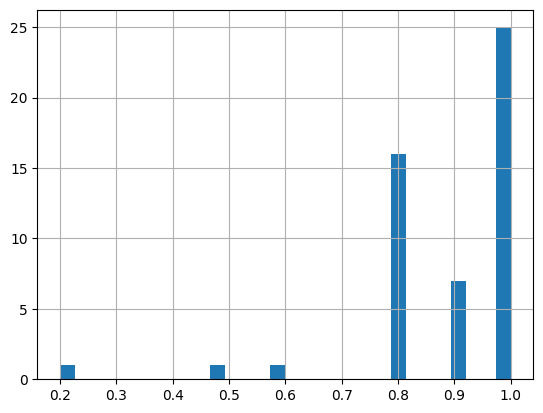

In [37]:
df3.bid2val.hist(bins=30)

<AxesSubplot: >

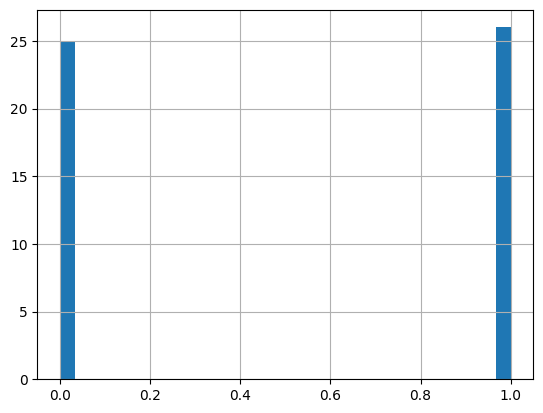

In [38]:
df3.asynchronous.hist(bins=30)

<AxesSubplot: >

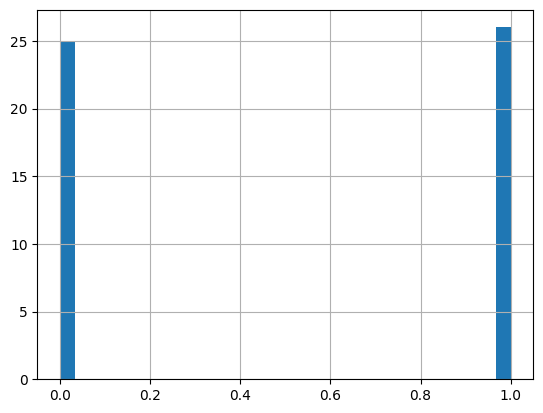

In [39]:
df3.design.hist(bins=30)

<AxesSubplot: >

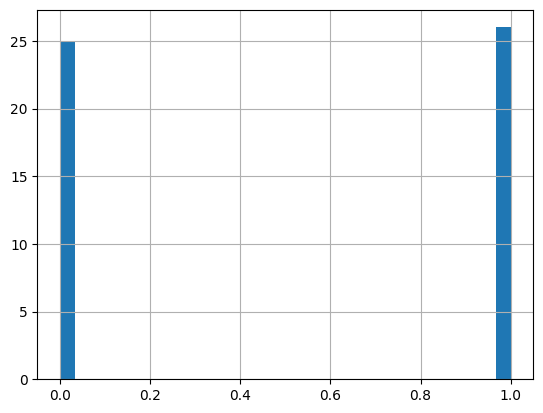

In [40]:
df3.asynchronous.hist(bins=30)

In [41]:
df3.head(20)

,bid2val,N,alpha,gamma,egreedy,asynchronous,design,feedback,num_actions,decay
0,1.0000,4,0.01,0.00,0,1,0,1,11,0.99990
1,1.0000,2,0.01,0.95,1,0,0,0,6,0.99995
2,0.9902,2,0.01,0.00,0,0,0,1,6,0.99990
3,0.9864,2,0.01,0.95,0,0,0,1,11,0.99995
4,0.8006,2,0.10,0.00,1,1,1,0,6,0.99990
5,0.4728,2,0.10,0.95,1,1,1,1,6,0.99995
6,1.0000,4,0.10,0.00,1,0,0,0,11,0.99995
7,0.9900,2,0.01,0.95,0,0,0,0,6,0.99990
8,1.0000,2,0.10,0.95,0,1,0,0,11,0.99990
9,1.0000,4,0.10,0.95,1,1,0,0,6,0.99990


### Box plots

<AxesSubplot: xlabel='asynchronous', ylabel='bid2val'>

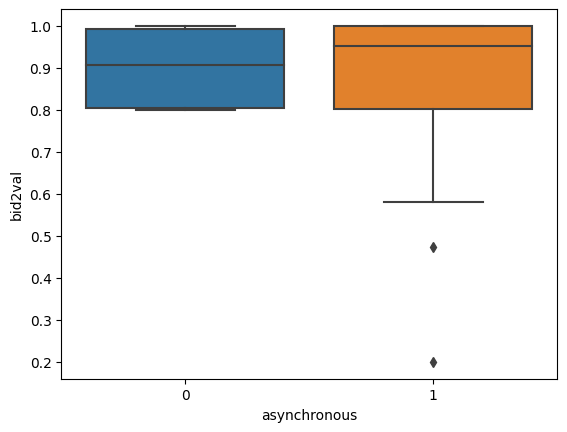

In [42]:
import seaborn as sns
sns.boxplot(data=df3, x="asynchronous", y="bid2val")

<AxesSubplot: xlabel='design', ylabel='bid2val'>

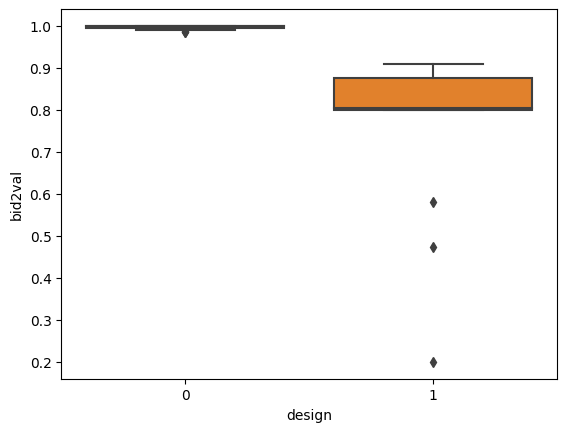

In [43]:
import seaborn as sns
sns.boxplot(data=df3, x="design", y="bid2val")

<AxesSubplot: xlabel='feedback', ylabel='bid2val'>

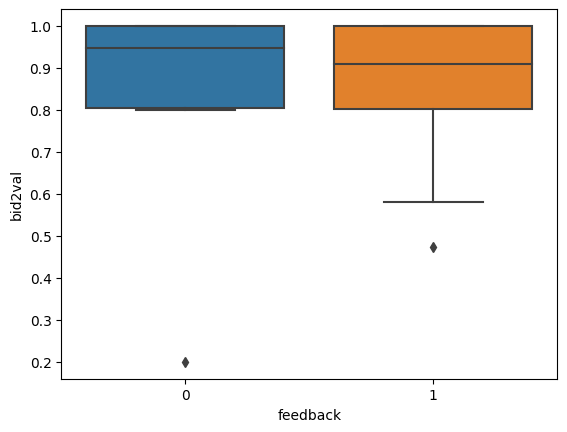

In [44]:
import seaborn as sns
sns.boxplot(data=df3, x="feedback", y="bid2val")

### Regression

In [45]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
results = smf.ols('bid2val ~ N + alpha + gamma + egreedy + design + asynchronous + feedback + num_actions + decay', data =df3).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                bid2val   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     6.589
Date:                Thu, 08 Jun 2023   Prob (F-statistic):           9.31e-06
Time:                        02:58:29   Log-Likelihood:                 46.964
No. Observations:                  51   AIC:                            -73.93
Df Residuals:                      41   BIC:                            -54.61
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      570.2548    650.798      0.876   

### Predictive performance

In [52]:
y = df3['bid2val']
X = df3.drop(['bid2val'],axis=1)
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
# Create a Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100,max_depth=6)
# Define the number of folds for cross-validation
k_folds = 3
# Perform cross-validation
kf = KFold(n_splits=k_folds, shuffle=True)
cross_val_scores = cross_val_score(rf_regressor, X, y, cv=kf, scoring='r2')
# Print the performance metrics
print("Cross-validation scores:", cross_val_scores)
print("Average R-squared:", cross_val_scores.mean())

Cross-validation scores: [0.59570677 0.35056523 0.66883258]
Average R-squared: 0.5383681937079458


### feature importance

In [53]:
rf_regressor.fit(X, y)
# Get feature importances
importances = rf_regressor.feature_importances_

# Get the indices that would sort the importances in descending order
indices = np.argsort(importances)[::-1]

# Print feature importance ranking
print("Feature Importance Ranking:")
for i, idx in enumerate(indices):
    print(f"{i + 1}. Feature {idx + 1}: {importances[idx]}")

Feature Importance Ranking:
1. Feature 6: 0.6152535118888801
2. Feature 1: 0.11394416181249142
3. Feature 8: 0.09181007317447744
4. Feature 9: 0.05592857567903205
5. Feature 5: 0.04193251273913815
6. Feature 3: 0.034620300298662844
7. Feature 7: 0.022658734814279387
8. Feature 4: 0.012920889297323422
9. Feature 2: 0.010931240295715227


In [55]:
from sklearn.ensemble import RandomForestRegressor
import eli5
from eli5.sklearn import PermutationImportance
rf_regressor = RandomForestRegressor(n_estimators=100)
rf_regressor.fit(X, y)
perm_importance = PermutationImportance(rf_regressor).fit(X, y)
eli5.show_weights(perm_importance)

Weight,Feature
1.3300 ± 0.3673,x5
0.3906 ± 0.4281,x0
0.0608 ± 0.0404,x7
0.0391 ± 0.0579,x4
0.0317 ± 0.0366,x2
0.0100 ± 0.0712,x8
0.0041 ± 0.0270,x3
0.0035 ± 0.0206,x6
-0.0011 ± 0.0255,x1


### Propensity Score Treatment Effect

In [56]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

X = df3.drop(['bid2val','design'],axis=1)
T  = df3['design']
# Concatenate the treatment indicator and covariates
data = pd.concat([T, X], axis=1)

# Fit a logistic regression model to estimate propensity scores
logit_model = sm.Logit(T, X)
propensity_scores = logit_model.fit().predict(X)

# Estimate the treatment effect using propensity scores
treated_outcomes = y[T == 1]
untreated_outcomes = y[T == 0]

ATE = np.mean(treated_outcomes) - np.mean(untreated_outcomes)

# Print the estimated treatment effect
print("Average Treatment Effect (ATE):", ATE)

Optimization terminated successfully.
         Current function value: 0.658452
         Iterations 5
Average Treatment Effect (ATE): -0.21212784615384606


In [73]:
y = df3['bid2val']
X = W = df3.drop(['bid2val','design'],axis=1)
T = df3['design']
from econml.dml import LinearDML
est = LinearDML()
est.fit(y, T, X=X, W=W)
est.const_marginal_effect(X)

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.205e-04, tolerance: 6.637e-05
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.201e-04, tolerance: 6.637e-05
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.142e-04, tolerance: 6.637e-05
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.097e-04, tolerance: 6.637e-05
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.040e-04, tolerance: 6.637e-05
Objective did n

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.669e-04, tolerance: 6.538e-05
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.651e-04, tolerance: 6.538e-05
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.627e-04, tolerance: 6.538e-05
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.593e-04, tolerance: 6.538e-05
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.245e-04, tolerance: 6.538e-05
Objective did n

array([-0.01233474, -0.28328196, -0.10794054, -0.19388483, -0.25825829,
       -0.38895508, -0.18240353, -0.18406617, -0.24498679, -0.22815755,
       -0.30722059, -0.30603996, -0.2584374 , -0.11155054, -0.16590323,
       -0.33732133, -0.19981359, -0.26511903, -0.09505024, -0.24498679,
       -0.36486339, -0.14283191, -0.33732133, -0.057179  , -0.1770556 ,
       -0.01394337, -0.02522504, -0.20406586, -0.1757219 , -0.1770556 ,
       -0.28953966, -0.18767616, -0.20715634, -0.33732133, -0.17117586,
       -0.27640071, -0.00839581, -0.1962036 , -0.24629997, -0.23843771,
       -0.35197308, -0.25825829, -0.1633136 , -0.30623958, -0.13889297,
       -0.25593953, -0.17017434, -0.12794023, -0.2872209 , -0.1385608 ,
       -0.15833235])

In [75]:
import numpy as np
import sklearn
from econml.orf import DMLOrthoForest, DROrthoForest
np.random.seed(123)
est = DMLOrthoForest(n_trees=1, max_depth=1, subsample_ratio=1,
                      model_T=sklearn.linear_model.LinearRegression(),
                    model_Y=sklearn.linear_model.LinearRegression())
est.fit(y, T, X=W, W=W)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.2s finished


In [77]:
print(est.effect(W[:2]))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf
RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf


[-0.17871361 -0.11271337]


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    4.8s finished


In [79]:
print(est.effect(W[:40]))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf
RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf


[-0.17871361 -0.11271337 -0.16005008 -0.13402474 -0.08890413 -0.04435438
 -0.18621826 -0.17882395 -0.12898937 -0.14714243 -0.20011561 -0.07576672
 -0.23380445 -0.11260302 -0.26546626 -0.14187731 -0.11523115 -0.19935567
 -0.19185101 -0.12898937 -0.14979027 -0.17871361 -0.14187731 -0.13137689
 -0.15217779 -0.15455645 -0.14691267 -0.25257832 -0.22066704 -0.15217779
 -0.15501472 -0.1313769  -0.09393949 -0.14187731 -0.21062489 -0.19171189
 -0.16506573 -0.16267821 -0.2499502  -0.16005008]


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    4.5s finished


In [ ]:
from econml.dml import NonParamDML
from sklearn.ensemble import GradientBoostingRegressor
est = NonParamDML(model_y=GradientBoostingRegressor(),
                  model_t=GradientBoostingRegressor(),
                  model_final=GradientBoostingRegressor())
est.fit(y, t, X=X, W=W)
point = est.effect(X, T0=t0, T1=t1)

### Mean comparision

In [59]:
df3.groupby('N').mean()

,bid2val,alpha,gamma,egreedy,asynchronous,design,feedback,num_actions,decay
N,,,,,,,,,
2,0.867368,0.0604,0.418000,0.360000,0.560000,0.440000,0.400000,8.400000,0.999928
4,0.909565,0.0550,0.365385,0.461538,0.461538,0.576923,0.576923,8.115385,0.999929


In [60]:
df3.groupby('alpha').mean()

,bid2val,N,gamma,egreedy,asynchronous,design,feedback,num_actions,decay
alpha,,,,,,,,,
0.01,0.919467,3.083333,0.435417,0.416667,0.416667,0.458333,0.62500,7.875000,0.999931
0.10,0.861693,2.962963,0.351852,0.407407,0.592593,0.555556,0.37037,8.592593,0.999926


In [61]:
df3.groupby('gamma').mean()

,bid2val,N,alpha,egreedy,asynchronous,design,feedback,num_actions,decay
gamma,,,,,,,,,
0.00,0.883293,3.066667,0.061000,0.366667,0.466667,0.566667,0.600000,8.166667,0.999927
0.95,0.896862,2.952381,0.052857,0.476190,0.571429,0.428571,0.333333,8.380952,0.999931


In [62]:
df3.groupby('egreedy').mean()

,bid2val,N,alpha,gamma,asynchronous,design,feedback,num_actions,decay
egreedy,,,,,,,,,
0,0.892587,2.933333,0.058000,0.348333,0.50000,0.50000,0.50000,8.166667,0.999925
1,0.883586,3.142857,0.057143,0.452381,0.52381,0.52381,0.47619,8.380952,0.999933


In [63]:
df3.groupby('design').mean()

,bid2val,N,alpha,gamma,egreedy,asynchronous,feedback,num_actions,decay
design,,,,,,,,,
0,0.997024,2.880000,0.053200,0.456000,0.400000,0.52,0.48,8.600000,0.999926
1,0.784896,3.153846,0.061923,0.328846,0.423077,0.50,0.50,7.923077,0.999931


In [64]:
df3.groupby('asynchronous').mean()

,bid2val,N,alpha,gamma,egreedy,design,feedback,num_actions,decay
asynchronous,,,,,,,,,
0,0.902708,3.120000,0.049600,0.342000,0.400000,0.52,0.640000,7.200000,0.999930
1,0.875585,2.923077,0.065385,0.438462,0.423077,0.50,0.346154,9.269231,0.999927


In [65]:
df3.groupby('feedback').mean()

,bid2val,N,alpha,gamma,egreedy,asynchronous,design,num_actions,decay
feedback,,,,,,,,,
0,0.888854,2.846154,0.068846,0.511538,0.423077,0.653846,0.50,8.692308,0.999925
1,0.888908,3.200000,0.046000,0.266000,0.400000,0.360000,0.52,7.800000,0.999932


In [66]:
df3.groupby('num_actions').mean()

,bid2val,N,alpha,gamma,egreedy,asynchronous,design,feedback,decay
num_actions,,,,,,,,,
6,0.873636,3.071429,0.051786,0.373214,0.392857,0.321429,0.571429,0.571429,0.999925
11,0.907439,2.956522,0.064783,0.413043,0.434783,0.739130,0.434783,0.391304,0.999933


### t-tests

In [67]:
import pandas as pd
import researchpy as rp
import scipy.stats as stats

In [68]:
summary, results = rp.ttest(group1= df3['bid2val'][df3['design'] == 0], group1_name= "Second Price",
         group2= df3['bid2val'][df3['design'] == 1], group2_name= "First Price")
print(summary)

       Variable     N      Mean        SD        SE  95% Conf.  Interval
0  Second Price  25.0  0.997024  0.005036  0.001007   0.994945  0.999103
1   First Price  26.0  0.784896  0.152841  0.029975   0.723162  0.846630
2      combined  51.0  0.888880  0.152192  0.021311   0.846076  0.931685


The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [69]:
print(results)

                           Independent t-test  results
0  Difference (Second Price - First Price) =    0.2121
1                       Degrees of freedom =   49.0000
2                                        t =    6.9332
3                    Two side test p value =    0.0000
4                   Difference < 0 p value =    1.0000
5                   Difference > 0 p value =    0.0000
6                                Cohen's d =    1.9420
7                                Hedge's g =    1.9122
8                           Glass's delta1 =   42.1252
9                         Point-Biserial r =    0.7037


In [70]:
stats.ttest_ind(df3['bid2val'][df3['design'] == 0],df3['bid2val'][df3['design'] == 1])

Ttest_indResult(statistic=6.933150753758319, pvalue=8.419991411600938e-09)